# XXCygny - Flat Field & Bias

**juliaroquette@28July2020:** Added a section that does a small script to recursively apply the flat field to any set of XXCygni images. 

I also added the suggestions of Sean:

- I now normalized color bars to the same scale. This works well in the body of this `jupyter-notebook`, but the sacale doesn't work as well when I am applying it recursively to all filters. TO DO: think on some logic for defining this scale based on parameters of the 5 flat field images just opened by the script. 
- I added a comparison between the median-combined flat with one of the individual flats.

**juliaroquette@23July2020:** I addeed some extra text and information and double checked everything and it seems to be working all right. 

**juliaroquette@14thNovember2019:** I came to Sean's class and started building this notebook in order to do the analysis of the XXCyg data as part of the basic experiment of PHY2026.

To do:
- Apply the FlatField to all the images. 

This imports some basic modules we are going to need:

(`numpy`: https://www.numpy.org/)

(`matplotlib`: https://matplotlib.org/)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

This is the directory containing the images and other data:

In [2]:
mymasterdir='/Users/jroquette/work/prog/jupyter/teaching/AstroLab/2018-10-01/'

`os` is a module that enables you interacting with the operational system (https://docs.python.org/3/library/os.html)

In [3]:
import os 

In [4]:
os.listdir(mymasterdir)

['.DS_Store',
 '2018-10-01.log',
 'xxcyg',
 'working',
 'Mars',
 'flats',
 'Observing Log 2018-10-01.txt']

This opens the observing log:

In [5]:
log=open(mymasterdir+'2018-10-01.log','r').readlines()

This shows a sample from the log of observations, which inform us that the images we want to process are in the `Sloanr` filter, so we want to use the flats in that filter as well. 

In [6]:
log[0:30]

['Log of FITS files in /Volumes/Astrophysics/Observations 2018-19/2018-10-01\n',
 'Subdirectory         File                 DATE-OBS             OBJECT   RA         DEC           EXPTIME/s FILTER    \n',
 '-------------------------------------------------------------------------------------------------\n',
 '/flats               g1_0_1s.fits         2018-10-01T18:07:20  Alpha Cam/9 Cam 04 54 03   +66 20 34     0.1        Sloang\n',
 '/flats               g2_0_1s.fits         2018-10-01T18:09:13  Alpha Cam/9 Cam 04 54 03   +66 20 34     0.1        Sloang\n',
 '/flats               g3_0_1s.fits         2018-10-01T18:09:53  Alpha Cam/9 Cam 04 53 13   +66 15 32     0.1        Sloang\n',
 '/flats               g4_0_1s.fits         2018-10-01T18:10:17  Alpha Cam/9 Cam 04 54 03   +66 15 32     0.1        Sloang\n',
 '/flats               g5_0_1s.fits         2018-10-01T18:10:35  Alpha Cam/9 Cam 04 54 52   +66 15 32     0.1        Sloang\n',
 '/flats               halpha1_1s.fits      2018-10

The images to be worked are in the directory `xxcyg/` so I will define a `mydatadir` with it:

In [7]:
mydatadir=mymasterdir+'xxcyg/'

This will get the name of all the datafiles inside `mydir`:
_(it is pretty much the same as saving the output of a `ls` command in `shell`)

In [8]:
datafilename=os.listdir(mydatadir)

This step is just to check that the file only contains `fits` files:

In [9]:
print('how many images',len(datafilename))

how many images 723


In [10]:
print(datafilename[0:10])
print(datafilename[-10:])

['CCD_Image_0266.fits', 'CCD_Image_0636.fits', 'CCD_Image_0323.fits', 'CCD_Image_0289.fits', 'CCD_Image_0773.fits', 'CCD_Image_0118.fits', 'CCD_Image_0548.fits', 'CCD_Image_0661.fits', 'CCD_Image_0231.fits', 'CCD_Image_0724.fits']
['CCD_Image_0176.fits', 'CCD_Image_0475.fits', 'CCD_Image_0160.fits', 'CCD_Image_0530.fits', 'CCD_Image_0619.fits', 'CCD_Image_0249.fits', 'CCD_Image_0422.fits', 'CCD_Image_0588.fits', 'CCD_Image_0567.fits', 'CCD_Image_0137.fits']


# Median-Combining the Flat Field images

This list the content of the flat folder:

In [11]:
myflatdir=mymasterdir+'flats/'
os.listdir(myflatdir)

['g5_0_1s.fits',
 'g3_0_1s.fits',
 'halpha5_1s.fits',
 'g4_0_1s.fits',
 '2018-09-27-flats',
 'i1_0_1s.fits',
 'g2_0_1s.fits',
 'r1_0_1s.fits',
 'halpha4_1s.fits',
 'halpha1_1s.fits',
 'r4_0_1s.fits',
 'i2_0_1s.fits',
 'r2_0_1s.fits',
 'g1_0_1s.fits',
 'i4_0_1s.fits',
 'r5_0_1s.fits',
 'halpha2_1s.fits',
 'i3_0_1s.fits',
 'r3_0_1s.fits',
 'halpha3_1s.fits',
 'i5_0_1s.fits']

### r-band

Let's get only the flats for the `r` filter:

In [12]:
flat_files=[]
for x in os.listdir(myflatdir):
    if x.startswith("r"):
        flat_files.append(x)

In [13]:
flat_files

['r1_0_1s.fits',
 'r4_0_1s.fits',
 'r2_0_1s.fits',
 'r5_0_1s.fits',
 'r3_0_1s.fits']

In [14]:
print('number of flat field images:',len(flat_files))

number of flat field images: 5


Let's open and visualize one of those images:

To open the images, we will use the module `astropy.io.fits`: https://docs.astropy.org/en/stable/io/fits/usage/image.html

In [15]:
import astropy.io.fits as fits

In [16]:
image=fits.open(myflatdir+flat_files[0])

In [17]:
image.info()

Filename: /Users/jroquette/work/prog/jupyter/teaching/AstroLab/2018-10-01/flats/r1_0_1s.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      49   (1092, 736)   int16 (rescales to uint16)   


This access the images data

In [18]:
image_data=image[0].data 
image_data.shape

(736, 1092)

This allows us to acess the header info:m

In [19]:
image_head=image[0].header

In [20]:
image_head[:]

SIMPLE  =                    T                                                  
BITPIX  =                   16 /8 unsigned int, 16 & 32 int, -32 & -64 real     
NAXIS   =                    2 /number of axes                                  
NAXIS1  =                 1092 /fastest changing axis                           
NAXIS2  =                  736 /next to fastest changing axis                   
BSCALE  =   1.0000000000000000 /physical = BZERO + BSCALE*array_value           
BZERO   =   32768.000000000000 /physical = BZERO + BSCALE*array_value           
DATE-OBS= '2018-10-01T18:11:03' /YYYY-MM-DDThh:mm:ss observation start, UT      
EXPTIME =  0.10000000000000001 /Exposure time in seconds                        
EXPOSURE=  0.10000000000000001 /Exposure time in seconds                        
XPIXSZ  =   13.600000000000000 /Pixel Width in microns (after binning)          
YPIXSZ  =   13.600000000000000 /Pixel Height in microns (after binning)         
XBINNING=                   

Note that the flag `HISTORY` informs us that the image was already dark-subtracted

In [21]:
image_head["HISTORY"]

 Dark subtraction (Simple Auto-dark)

In [22]:
image.close()

### visualizing the image:

Note that the `image_data` is simply a matrix 736x1092 that contains the CCD counting in each position `i,j`

In [23]:
print(image_data.shape)
print(image_data)

(736, 1092)
[[ 9975 10325 10284 ...  9972  9835  9453]
 [ 9725 10204 10219 ...  9858  9878  9324]
 [ 9733 10284 10206 ...  9900  9818  9299]
 ...
 [10476 10984 11015 ... 10465 10437  9882]
 [10381 10955 10995 ... 10420 10277  9741]
 [ 5202  5708  5557 ...  5140  5357  4935]]


The `plt.imshow` (https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imshow.html) gives us a simple visualization of the image:

Text(0.5, 1.0, 'counts')

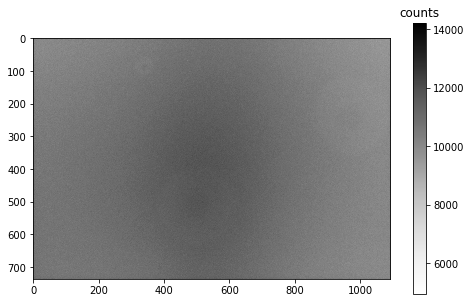

In [24]:
fig=plt.figure(figsize=(8,5))
ax = plt.subplot()
#plot image
a=ax.imshow(image_data,cmap='Greys')
cb=fig.colorbar(a, ax=ax)
cb.ax.set_title('counts')

This gets some statistics in the image:

In [25]:
print(np.nanmin(image_data),np.nanmax(image_data),np.nanmean(image_data),
      np.nanmedian(image_data),np.nanstd(image_data))

4935 14228 10756.196616449673 10755.0 538.7123127546002


We can get _better_ $\sigma$-clipping statistics with Astropy Astrostatistics tools: https://docs.astropy.org/en/stable/stats/

In [26]:
from astropy.stats import sigma_clipped_stats

In [27]:
im_mean,im_median,im_std = sigma_clipped_stats(image_data,sigma=5.0)
print(im_mean,im_median,im_std)

10763.176770049053 10756.0 504.6077665957433


Text(0, 0.5, 'number of pixels')

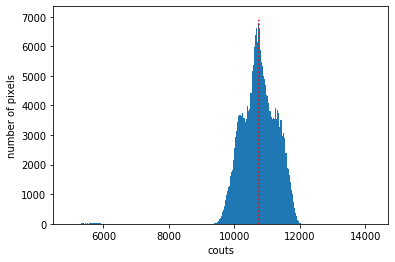

In [28]:
histogram = plt.hist(image_data.flatten(), bins=1000)
plt.plot([np.nanmedian(image_data),np.nanmedian(image_data)],[0,7e3],'r:')
plt.xlabel('couts')
plt.ylabel('number of pixels')

I will process the flat-field images by:
1. Normalizing each image by its median value
2. Median combining the five flat-field images. This is done by creating a new flat-field image in which each pixel is estimated as the median of that pixel in each of the 5 flat-field images.
3. Normalize the combined image by its median value.

1. 

We will start by opening the 5 images and storing them in a list:

In [37]:
flat_images=[]
flat_headers=[]
for x in flat_files:
    image=fits.open(myflatdir+x)
    flat_images.append(image[0].data)
    flat_headers.append(image[0].header)
    image.close()

It is convenient to creat a color-scale that is commonn to all the images, so we can directly compare them.

In [30]:
print(im_mean-5*im_std,im_mean)

8240.137937070336 10763.176770049053


In [53]:
norm = mpl.colors.Normalize(vmin=8500,vmax=10000) 

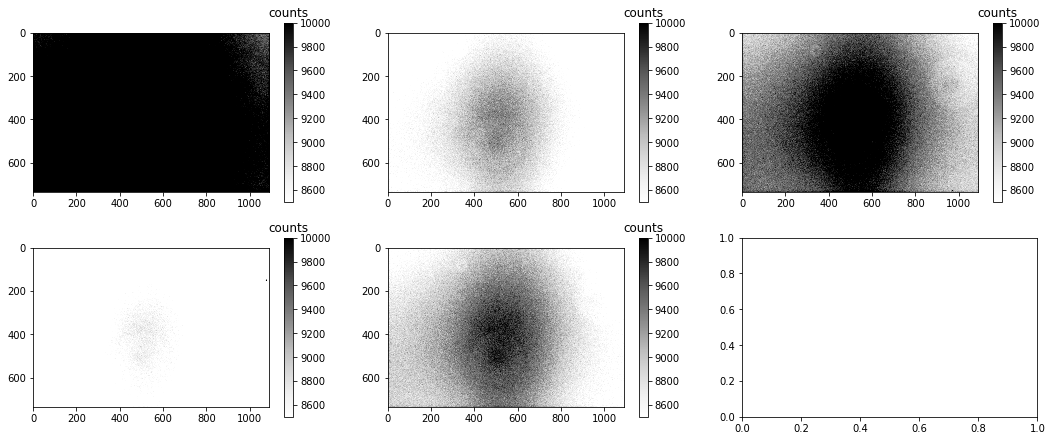

In [54]:
fig, axes = plt.subplots(2,3, figsize=(6*3,3.625*2))
for i,j in enumerate([(0,0),(0,1),(0,2),(1,0),(1,1)]):
    ax=axes[j]
    a=ax.imshow(flat_images[i],cmap='Greys',norm=norm)
    cb=fig.colorbar(a, ax=ax)
    cb.ax.set_title('counts')

Now, inside a similar loop, I will divide each image by its median vaue:

In [59]:
for i,x in enumerate(flat_images):
    flat_images[i]=x/(np.nanmedian(x))

This show an example of the effect of this median-normalization to the counts in the image:

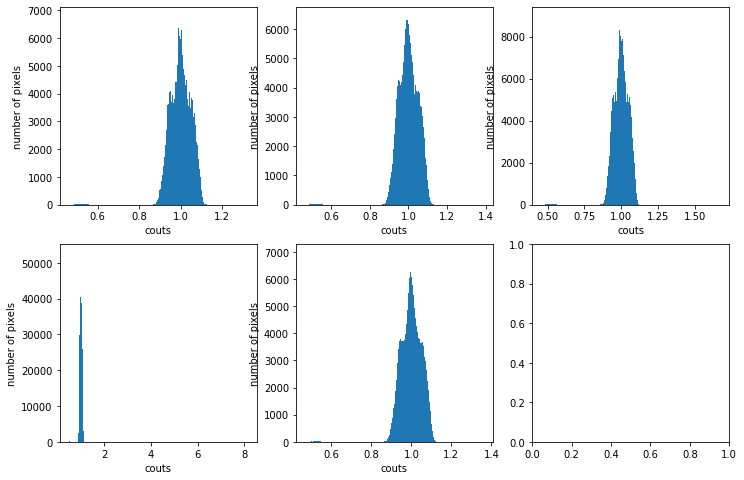

In [60]:
fig, axes = plt.subplots(2,3, figsize=(4*3,4*2))
for i,j in enumerate([(0,0),(0,1),(0,2),(1,0),(1,1)]):
    ax=axes[j]
    histogram = ax.hist(flat_images[i].flatten(), bins=1000)
    ax.set_xlabel('couts')
    ax.set_ylabel('number of pixels')

In [61]:
norm_= mpl.colors.Normalize(vmin=1.2,vmax=0.5) 

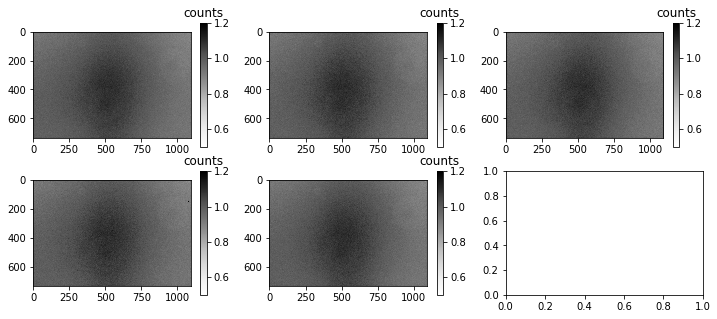

In [62]:
fig, axes = plt.subplots(2,3, figsize=(4*3,2.5*2))
for i,j in enumerate([(0,0),(0,1),(0,2),(1,0),(1,1)]):
    ax=axes[j]
    a=ax.imshow(flat_images[i],cmap='Greys',norm=norm_)
    cb=fig.colorbar(a, ax=ax)
    cb.ax.set_title('counts')

2. To median combine the images, one can simply use `numpy` to stack the 5 2d images into a 3d array, and then to take the median in `axis=0` (https://stackoverflow.com/questions/13753251/median-combining-fits-images-in-python)

`flat_images` is a `list` that contains the 5 `(736,1092)` arrays with the images. You can transform this list in an `(5,736,1092)` array as folows:

In [63]:
combining=np.array(flat_images)
combining.shape

(5, 736, 1092)

Next you can use `np.median` along the first axis to median-combine the images.  https://numpy.org/doc/stable/reference/generated/numpy.median.html

We saw the the `shape` of combining was`(5, 736, 1092)`, so it has 3 axis: `(axis=0,axis=1,axis=2)`.

In [64]:
combined=np.median(combining, axis=0)
combined.shape

(736, 1092)

Text(0, 0.5, 'number of pixels')

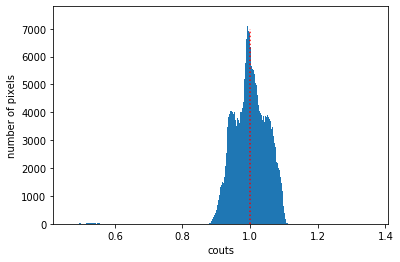

In [65]:
histogram = plt.hist(combined.flatten(), bins=1000)
plt.plot([np.nanmedian(combined),np.nanmedian(combined)],[0,7e3],'r:')
plt.xlabel('couts')
plt.ylabel('number of pixels')

Text(0.5, 1.0, 'counts')

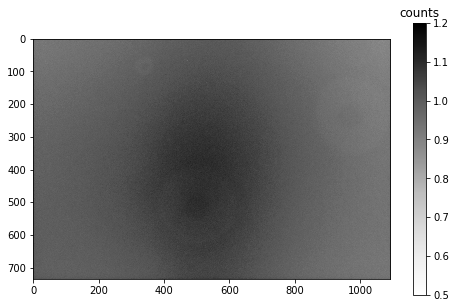

In [66]:
fig=plt.figure(figsize=(8,5))
ax = plt.subplot()
#plot image
a=ax.imshow(combined,cmap='Greys',norm=norm_)
cb=fig.colorbar(a, ax=ax)
cb.ax.set_title('counts')

In [67]:
np.nanmedian(combined)

0.9995551106662218

3. Now we can normalize the combined image by its median value:

In [68]:
combined=combined/(np.nanmedian(combined))

Text(0, 0.5, 'number of pixels')

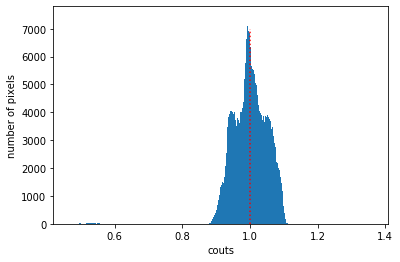

In [69]:
histogram = plt.hist(combined.flatten(), bins=1000)
plt.plot([np.nanmedian(combined),np.nanmedian(combined)],[0,7e3],'r:')
plt.xlabel('couts')
plt.ylabel('number of pixels')

In [70]:
np.nanmedian(combined)

1.0

Text(0.5, 1.0, 'individual flat')

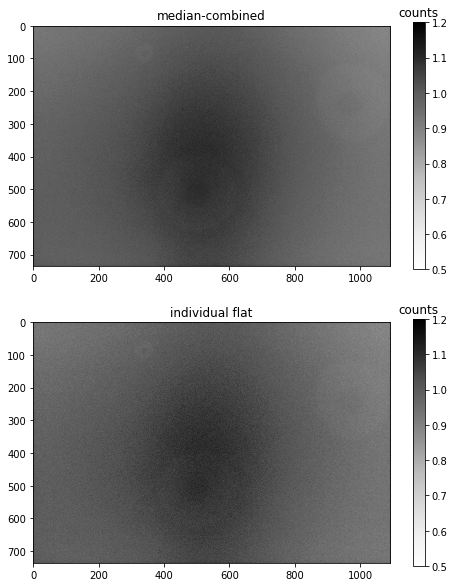

In [71]:
fig, axes = plt.subplots(2,1, figsize=(8,10))


#plot image
ax=axes[0]
a=ax.imshow(combined,cmap='Greys',norm=norm_)
cb=fig.colorbar(a, ax=ax)
cb.ax.set_title('counts')
ax.set_title('median-combined')
#plot individual flat
ax=axes[1]
a=ax.imshow(flat_images[0],cmap='Greys',norm=norm_)
cb=fig.colorbar(a, ax=ax)
cb.ax.set_title('counts')
ax.set_title('individual flat')

#### exporting this as a new image:

How to create a fits image: 
https://docs.astropy.org/en/stable/generated/examples/io/skip_create-large-fits.html

In [72]:
hdu = fits.PrimaryHDU(data=combined) # creates a primary hdu containing the data

In [73]:
hdu.header #creates a basic header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1092                                                  
NAXIS2  =                  736                                                  
EXTEND  =                    T                                                  

Here I will add some information to the header of my immage:

In [74]:
from datetime import date
print(date.today().strftime("%B %d, %Y"))

July 28, 2020


In [75]:
hdu.header['Date']=date.today().strftime("%B %d, %Y")

In [76]:
flat_files[0]

'r1_0_1s.fits'

In [77]:
ff=''
for f in flat_files: ff=ff+','+f[:-6]
hdu.header['flats']=ff

In [78]:
hdu.header['Who']="Julia Roquette"

We probably want to keep some of the info from the flat images. **JR: This can improve later to get more appropriate values**

For example, to keep `HISTORY`, `FILTER` and `EXPTIME`

In [79]:
keys_to_keep=['HISTORY','FILTER','EXPTIME']
for k in keys_to_keep:
    hdu.header[k]=str(image_head[k])
    print(k,image_head[k])

HISTORY  Dark subtraction (Simple Auto-dark)
FILTER Sloanr
EXPTIME 0.1


In [80]:
hdu.header #creates a basic header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1092                                                  
NAXIS2  =                  736                                                  
EXTEND  =                    T                                                  
DATE    = 'July 28, 2020'                                                       
FLATS   = ',r1_0_1,r4_0_1,r2_0_1,r5_0_1,r3_0_1'                                 
WHO     = 'Julia Roquette'                                                      
FILTER  = 'Sloanr  '                                                            
EXPTIME = '0.1     '                                                            
HISTORY  Dark subtraction (Simple Auto-dark)                                    

In [81]:
name_new_file=flat_files[0][0]+'median_combined'+flat_files[0][2:]
print(name_new_file)

rmedian_combined_0_1s.fits


In [82]:
outfile = mymasterdir+'working/'+name_new_file
hdu = fits.PrimaryHDU(combined)#,header=image_head)
hdu.writeto(outfile, overwrite=True)

In [83]:
name_new_file

'rmedian_combined_0_1s.fits'

**JR: At this point, the students can open the image they exported with ds9 and inspect it**

### i, g and halpha bands:

Now let's apply this recursively to all the other filters:

In [84]:
os.listdir(myflatdir)

['g5_0_1s.fits',
 'g3_0_1s.fits',
 'halpha5_1s.fits',
 'g4_0_1s.fits',
 '2018-09-27-flats',
 'i1_0_1s.fits',
 'g2_0_1s.fits',
 'r1_0_1s.fits',
 'halpha4_1s.fits',
 'halpha1_1s.fits',
 'r4_0_1s.fits',
 'i2_0_1s.fits',
 'r2_0_1s.fits',
 'g1_0_1s.fits',
 'i4_0_1s.fits',
 'r5_0_1s.fits',
 'halpha2_1s.fits',
 'i3_0_1s.fits',
 'r3_0_1s.fits',
 'halpha3_1s.fits',
 'i5_0_1s.fits']

['g5_0_1s.fits', 'g3_0_1s.fits', 'g4_0_1s.fits', 'g2_0_1s.fits', 'g1_0_1s.fits']
number of flat field images: 5
Sloang
July 28, 2020
HISTORY  Dark subtraction (Simple Auto-dark)
FILTER Sloanr
EXPTIME 10.0
SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -64 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                 1092                                                  NAXIS2  =                  736                                                  EXTEND  =                    T                                                  DATE    = 'July 28, 2020'                                                       FLATS   = ',g5_0_1,g3_0_1,g4_0_1,g2_0_1,g1_0_1'                                 WHO     = 'Julia Roquette'                                                      FILTER  = 'Sloanr  '                                                       

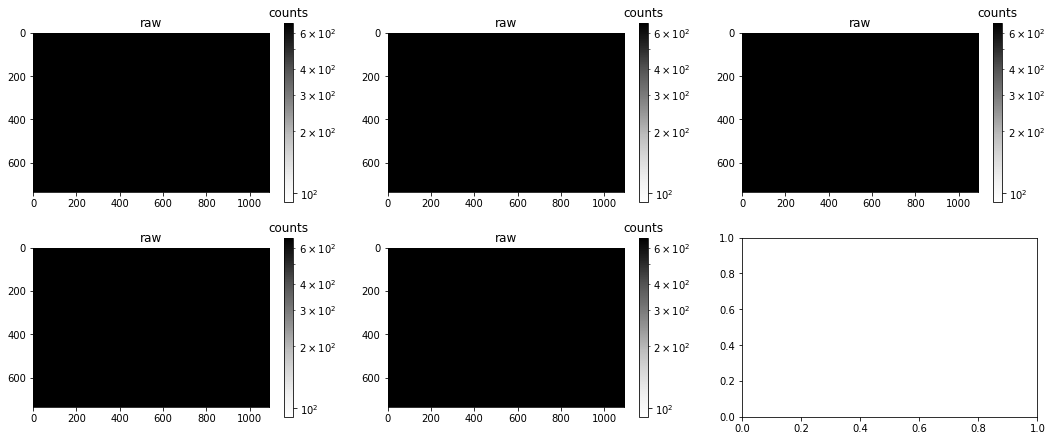

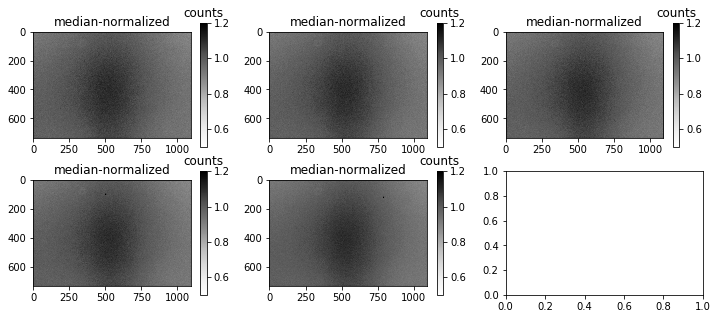

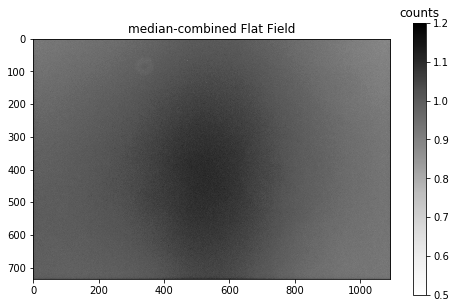

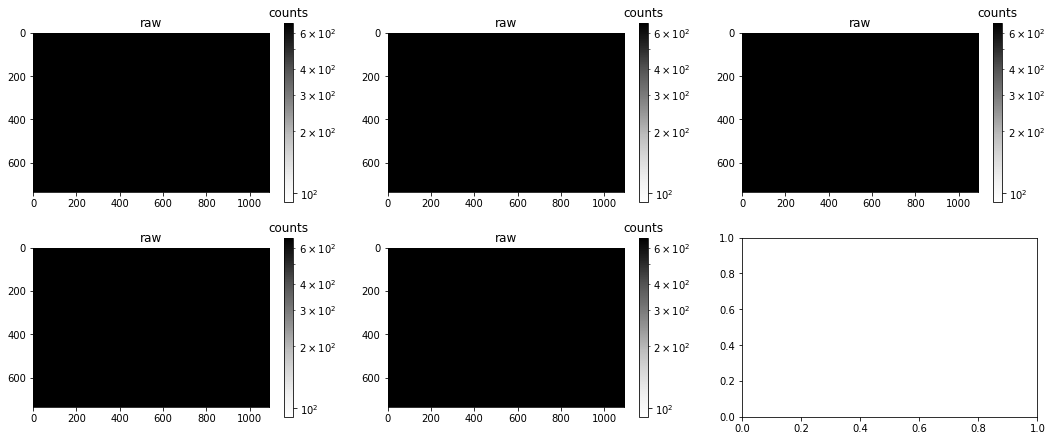

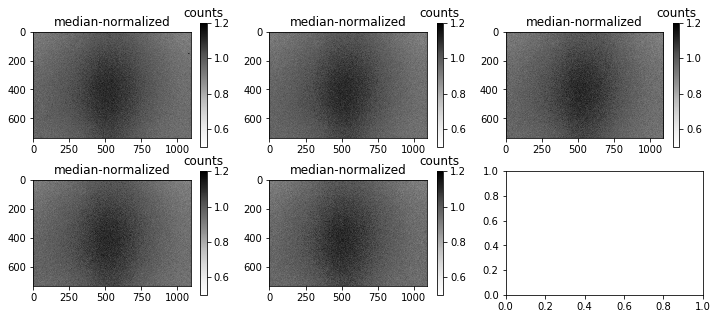

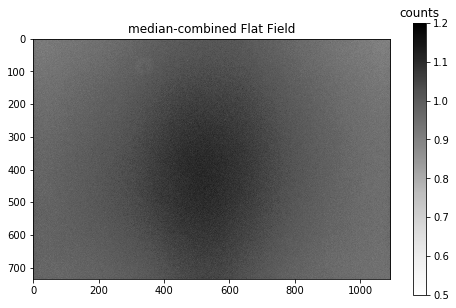

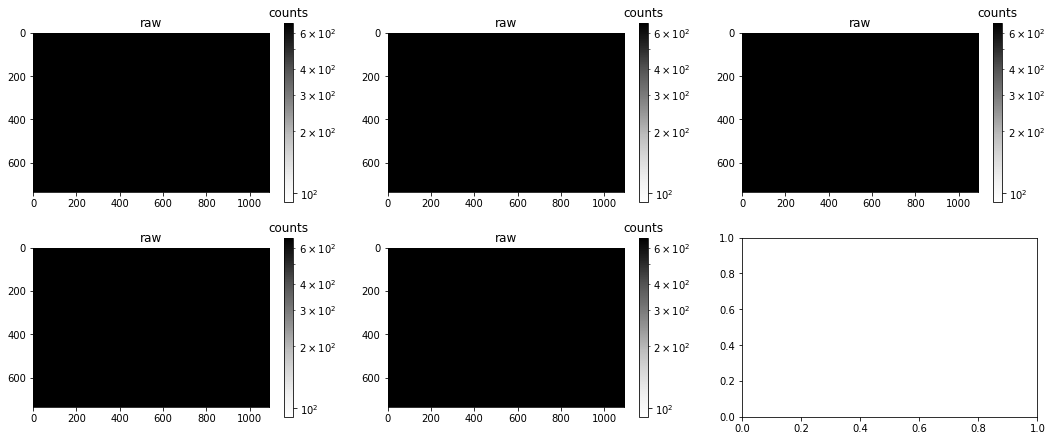

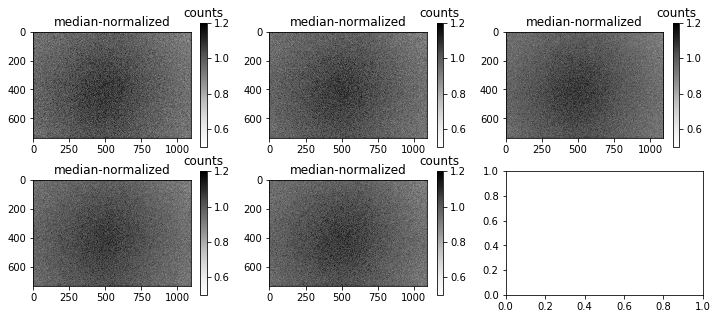

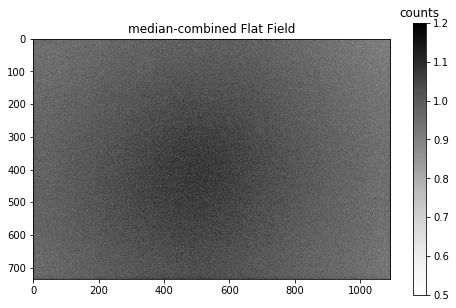

In [103]:
for band in ['g','i','halpha']:
    flat_files=[]
    for x in os.listdir(myflatdir):
        if x.startswith(band):
            flat_files.append(x)
    print(flat_files)
    print('number of flat field images:',len(flat_files))    
    flat_images=[]
    flat_headers=[]
    for x in flat_files:
        image=fits.open(myflatdir+x)
        flat_images.append(image[0].data)
        flat_headers.append(image[0].header)
        image.close()   
    print(flat_headers[0]['FILTER' ])
    fig, axes = plt.subplots(2,3, figsize=(6*3,3.625*2))
    for i,j in enumerate([(0,0),(0,1),(0,2),(1,0),(1,1)]):
        ax=axes[j]
        a=ax.imshow(flat_images[i],cmap='Greys',norm=norm)
        cb=fig.colorbar(a, ax=ax)
        cb.ax.set_title('counts')   
        ax.set_title('raw')
    for i,x in enumerate(flat_images):
        flat_images[i]=x/(np.nanmedian(x)) 
    fig, axes = plt.subplots(2,3, figsize=(4*3,2.5*2))
    for i,j in enumerate([(0,0),(0,1),(0,2),(1,0),(1,1)]):
        ax=axes[j]
        a=ax.imshow(flat_images[i],cmap='Greys',norm=norm_)
        cb=fig.colorbar(a, ax=ax)
        cb.ax.set_title('counts')        
        ax.set_title('median-normalized')  
    combining=np.array(flat_images)
    combined=np.median(combining, axis=0)
    combined=combined/(np.nanmedian(combined))
    fig=plt.figure(figsize=(8,5))
    ax = plt.subplot()
    #plot image
    a=ax.imshow(combined,cmap='Greys',norm=norm_)
    cb=fig.colorbar(a, ax=ax)
    cb.ax.set_title('counts')
    ax.set_title('median-combined Flat Field')  
    hdu = fits.PrimaryHDU(data=combined) # creates a primary hdu containing the data
    from datetime import date
    print(date.today().strftime("%B %d, %Y"))  
    hdu.header['Date']=date.today().strftime("%B %d, %Y")
    ff=''
    for f in flat_files: ff=ff+','+f[:-6]
    hdu.header['flats']=ff
    hdu.header['Who']="Julia Roquette"
    keys_to_keep=['HISTORY','FILTER','EXPTIME']
    for k in keys_to_keep:
        hdu.header[k]=str(image_head[k])
        print(k,image_head[k])
    print(hdu.header)
    name_new_file=flat_files[0][0]+'median_combined'+flat_files[0][2:]
    print('saving median-combined flat field as...',name_new_file)    
    outfile = mymasterdir+'working/'+name_new_file
    hdu = fits.PrimaryHDU(combined)#,header=image_head)
    hdu.writeto(outfile, overwrite=True)

## Applying the combined Flat-field to XXCyg images:

Let's open one of the XXCyg images. This is the list of filenames with data that we defined at the beginning. 

In [86]:
datafilename[:10]

['CCD_Image_0266.fits',
 'CCD_Image_0636.fits',
 'CCD_Image_0323.fits',
 'CCD_Image_0289.fits',
 'CCD_Image_0773.fits',
 'CCD_Image_0118.fits',
 'CCD_Image_0548.fits',
 'CCD_Image_0661.fits',
 'CCD_Image_0231.fits',
 'CCD_Image_0724.fits']

To open one of the images:

In [87]:
image=fits.open(mydatadir+datafilename[0])

In [88]:
datafilename[0]

'CCD_Image_0266.fits'

In [89]:
image.info()

Filename: /Users/jroquette/work/prog/jupyter/teaching/AstroLab/2018-10-01/xxcyg/CCD_Image_0266.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      48   (1092, 736)   int16 (rescales to uint16)   


This access the images data

In [90]:
image_data=image[0].data 
image_data.shape

(736, 1092)

This allows us to acess the header info

In [91]:
image_head=image[0].header

In [92]:
image_head[:]

SIMPLE  =                    T                                                  
BITPIX  =                   16 /8 unsigned int, 16 & 32 int, -32 & -64 real     
NAXIS   =                    2 /number of axes                                  
NAXIS1  =                 1092 /fastest changing axis                           
NAXIS2  =                  736 /next to fastest changing axis                   
BSCALE  =   1.0000000000000000 /physical = BZERO + BSCALE*array_value           
BZERO   =   32768.000000000000 /physical = BZERO + BSCALE*array_value           
DATE-OBS= '2018-10-01T21:23:06' /YYYY-MM-DDThh:mm:ss observation start, UT      
EXPTIME =   10.000000000000000 /Exposure time in seconds                        
EXPOSURE=   10.000000000000000 /Exposure time in seconds                        
SET-TEMP=  -20.000000000000000 /CCD temperature setpoint in C                   
CCD-TEMP=  -19.937500000000000 /CCD temperature at start of exposure in C       
XPIXSZ  =   13.6000000000000

Note that the flag `HISTORY` informs us that the image was already dark-subtracted

In [93]:
image_head["HISTORY"]

 Dark subtraction (Simple Auto-dark)

**JR: Note that those images didn't have WCS added to their header! We will have to think of it later. There is a package called `astroalign` (https://pypi.org/project/astroalign/) that should handle that, or another Astropy related package to align images called `reproject`(
    https://reproject.readthedocs.io/en/stable/), but I still didn't test any of them**

If there was already WCS, we could already process it using `astropy.WCS` (https://docs.astropy.org/en/stable/wcs/) as follows.

In [94]:
from astropy.wcs import WCS

In [95]:
wcs_test = WCS(image_head)
print(wcs_test)

WCS Keywords

Number of WCS axes: 2
CTYPE : ''  ''  
CRVAL : 0.0  0.0  
CRPIX : 0.0  0.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 1.0  1.0  
NAXIS : 1092  736


**JR: This step would come here, because if we already have the WCS, we could plot the image in sky coordinates**

In [96]:
image.close()

This gives us a simple visualization of the image:

Text(0.5, 1.0, 'counts')

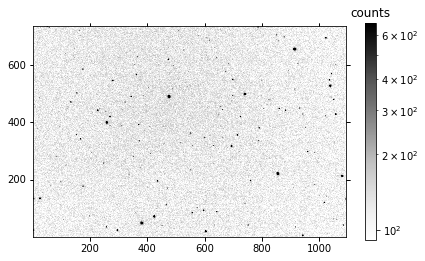

In [97]:
from matplotlib.colors import LogNorm

plt.figure(figsize=(7,4))
norm = LogNorm()
uplim=np.percentile(image_data.flatten(),99.9)
downlim=np.percentile(image_data.flatten(),10)

#This now includes the information about the projection:
ax = plt.subplot(projection=wcs_test)
#
a=ax.imshow(image_data,cmap='Greys',norm=norm,vmin=downlim,vmax=uplim)
cb=fig.colorbar(a, ax=ax)
cb.ax.set_title('counts')

As before, here are some statistics about the image:

In [75]:
print(np.nanmin(image_data),np.nanmax(image_data),np.nanmean(image_data),
      np.nanmedian(image_data),np.nanstd(image_data))

0 42739 124.52210742156394 121.0 177.4276530788158


In [76]:
im_mean,im_median,im_std = sigma_clipped_stats(image_data,sigma=5.0)
print(im_mean,im_median,im_std)

121.09446383803274 121.0 24.111096598645258


Text(0, 0.5, 'number of pixels')

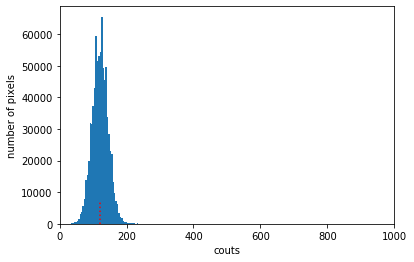

In [77]:
histogram = plt.hist(image_data.flatten(), bins=10000)
plt.plot([np.nanmedian(image_data),np.nanmedian(image_data)],[0,7e3],'r:')
plt.xlim(0,1000)
plt.xlabel('couts')
plt.ylabel('number of pixels')

# Flat Fielding observed images

The operation to be done is $\frac{IMAGE-BIAS}{FLAT-BIAS}$, but as the BIAS subtraction was already done, this is reduced simply to $\frac{IMAGE}{FLAT}$

Remember that our median-combined flat field is in the variable `combined`, so:

In [78]:
calibrated=image_data/combined

Text(0.5, 1.0, 'counts')

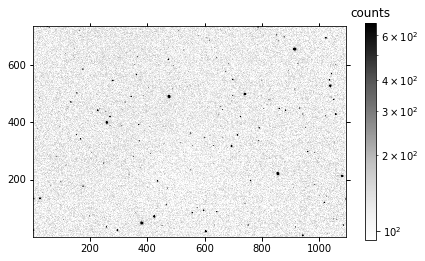

In [79]:
from matplotlib.colors import LogNorm

plt.figure(figsize=(7,4))
norm = LogNorm()
uplim=np.percentile(calibrated.flatten(),99.9)
downlim=np.percentile(calibrated.flatten(),10)

#This now includes the information about the projection:
ax = plt.subplot(projection=wcs_test)
#
a=ax.imshow(calibrated,cmap='Greys',norm=norm,vmin=downlim,vmax=uplim)
cb=fig.colorbar(a, ax=ax)
cb.ax.set_title('counts')

I will save this file by adding `f_` to the filename, meaning it was flatfielded. 

We will keep the header from the original image, so I will create the `hdu` giving a `header=image_head`:

In [80]:
hdu = fits.PrimaryHDU(data=calibrated,header=image_head) # creates a primary hdu containing the data

In [81]:
hdu.header #creates a basic header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1092                                                  
NAXIS2  =                  736                                                  
DATE-OBS= '2018-10-01T21:23:06' /YYYY-MM-DDThh:mm:ss observation start, UT      
EXPTIME =   10.000000000000000 /Exposure time in seconds                        
EXPOSURE=   10.000000000000000 /Exposure time in seconds                        
SET-TEMP=  -20.000000000000000 /CCD temperature setpoint in C                   
CCD-TEMP=  -19.937500000000000 /CCD temperature at start of exposure in C       
XPIXSZ  =   13.600000000000000 /Pixel Width in microns (after binning)          
YPIXSZ  =   13.600000000000000 /Pixel Height in microns (after binning)         
XBINNING=                   

but let's add a comment informing that we did flat-fielded the image:

In [70]:
hdu.header['FlatField']=name_new_file
hdu.header['FlatField']

'rmedian_combined_0_1s.fits'

In [86]:
outfile = mymasterdir+'working/'+'f_'+datafilename[0]
hdu.writeto(outfile, overwrite=True)

**JR: At this point, Sean said the students to open the image and check how the flatfield change the countings at the center and corners of the image. This can be checked with the DS9 outside**

### Applying for the whole set of images

In [102]:
os.listdir(mymasterdir+'working/' )

['rmedian_combined_0_1s.fits',
 'CalibratedImage_test.fits',
 'gmedian_combined_0_1s.fits',
 'test.fits',
 'f_CCD_Image_0266.fits',
 'hmedian_combinedlpha5_1s.fits',
 'imedian_combined_0_1s.fits']

Now we need to apply all these steps recursively to all the observed images of XXCygni. First, I will create a function that applies all the previous steps to any image.

In [128]:
def flatfield(image_name,image_data,image_head,flat_field_name,mydir='/Users/jroquette/work/prog/jupyter/teaching/AstroLab/2018-10-01/'):
    print('I am working in the directory:',mydir)
    print('Opening the image file:',image_name)
    print('Opening the flat field file:',flat_field_name)    
    flat=fits.open(mydir+'working/'+flat_field_name)
    flat_image=flat[0].data 
    flat.close()
    calibrated=image_data/combined
    new_image_name='f_'+image_name
    print('creating a new image file called: ',new_image_name)
    hdu = fits.PrimaryHDU(data=calibrated,header=image_head) # creates a primary hdu containing the data
    hdu.header['FlatField']=flat_field_name
    hdu.header['FlatField']
    outfile=mydir+'/working/'+new_image_name
    hdu.writeto(outfile, overwrite=True)

This defines a dictionary that will inform what is the name of the flat field file appropriate for each filter:

In [121]:
filter_flat_field={'Sloang':'gmedian_combined_0_1s.fits','Sloanr':'rmedian_combined_0_1s.fits',
                   'Sloani':'imedian_combined_0_1s.fits' ,'Halpha':'hmedian_combinedlpha5_1s.fits'}

In [122]:
filter_flat_field

{'Sloang': 'gmedian_combined_0_1s.fits',
 'Sloanr': 'rmedian_combined_0_1s.fits',
 'Sloani': 'imedian_combined_0_1s.fits',
 'Halpha': 'hmedian_combinedlpha5_1s.fits'}

This function 

The name of these images are in the variable `datafilename`, that contains names for 723 images. I will do an example on how to apply that to 10 images, by my scrpt could be applied to all the images by simply removing the `[:10]` bit after `for i,name in enumerate(datafilename(...)`

In [127]:
for i,image_name in enumerate(datafilename[0:10]):
    image=fits.open(mydatadir+image_name)
    image_data=image[0].data 
    image_head=image[0].header   
    flat_field_name=filter_flat_field[image_head['FILTER']]
    flatfield(image_name,image_data,image_head,flat_field_name)

I am working in the directory: /Users/jroquette/work/prog/jupyter/teaching/AstroLab/2018-10-01/
Opening the image file: CCD_Image_0266.fits
Opening the flat field file: rmedian_combined_0_1s.fits
creating a new image file called:  f_CCD_Image_0266.fits
I am working in the directory: /Users/jroquette/work/prog/jupyter/teaching/AstroLab/2018-10-01/
Opening the image file: CCD_Image_0636.fits
Opening the flat field file: rmedian_combined_0_1s.fits
creating a new image file called:  f_CCD_Image_0636.fits
I am working in the directory: /Users/jroquette/work/prog/jupyter/teaching/AstroLab/2018-10-01/
Opening the image file: CCD_Image_0323.fits
Opening the flat field file: rmedian_combined_0_1s.fits
creating a new image file called:  f_CCD_Image_0323.fits
I am working in the directory: /Users/jroquette/work/prog/jupyter/teaching/AstroLab/2018-10-01/
Opening the image file: CCD_Image_0289.fits
Opening the flat field file: rmedian_combined_0_1s.fits


creating a new image file called:  f_CCD_Image_0289.fits
I am working in the directory: /Users/jroquette/work/prog/jupyter/teaching/AstroLab/2018-10-01/
Opening the image file: CCD_Image_0773.fits
Opening the flat field file: rmedian_combined_0_1s.fits
creating a new image file called:  f_CCD_Image_0773.fits
I am working in the directory: /Users/jroquette/work/prog/jupyter/teaching/AstroLab/2018-10-01/
Opening the image file: CCD_Image_0118.fits
Opening the flat field file: rmedian_combined_0_1s.fits
creating a new image file called:  f_CCD_Image_0118.fits
I am working in the directory: /Users/jroquette/work/prog/jupyter/teaching/AstroLab/2018-10-01/
Opening the image file: CCD_Image_0548.fits
Opening the flat field file: rmedian_combined_0_1s.fits
creating a new image file called:  f_CCD_Image_0548.fits
I am working in the directory: /Users/jroquette/work/prog/jupyter/teaching/AstroLab/2018-10-01/
Opening the image file: CCD_Image_0661.fits
Opening the flat field file: rmedian_combine